In [1]:
import pandas as pd

In [2]:
gym = pd.read_csv("gym.csv")

In [3]:
print(gym)

                 timestamp  min_power  mean_power  max_power
0      2010-04-06 01:00:00          0           0          0
1      2010-04-06 02:00:00          0           0          0
2      2010-04-06 03:00:00          0           0          0
3      2010-04-06 04:00:00          0           0          0
4      2010-04-06 05:00:00          0           0          0
...                    ...        ...         ...        ...
87403  2020-12-31 20:00:00          0           0          0
87404  2020-12-31 21:00:00          0           0          0
87405  2020-12-31 22:00:00          0           0          0
87406  2020-12-31 23:00:00          0           0          0
87407  2020-12-31 00:00:00          0           0          0

[87408 rows x 4 columns]


In [4]:
gym.dtypes

timestamp     object
min_power      int64
mean_power     int64
max_power      int64
dtype: object

In [5]:
print(type(gym['timestamp'][0]))

<class 'str'>


In [6]:
from datetime import datetime

In [7]:
gym['timestamp'] = pd.to_datetime(gym['timestamp'])

In [8]:
print(gym)

                timestamp  min_power  mean_power  max_power
0     2010-04-06 01:00:00          0           0          0
1     2010-04-06 02:00:00          0           0          0
2     2010-04-06 03:00:00          0           0          0
3     2010-04-06 04:00:00          0           0          0
4     2010-04-06 05:00:00          0           0          0
...                   ...        ...         ...        ...
87403 2020-12-31 20:00:00          0           0          0
87404 2020-12-31 21:00:00          0           0          0
87405 2020-12-31 22:00:00          0           0          0
87406 2020-12-31 23:00:00          0           0          0
87407 2020-12-31 00:00:00          0           0          0

[87408 rows x 4 columns]


In [9]:
gym.dtypes

timestamp     datetime64[ns]
min_power              int64
mean_power             int64
max_power              int64
dtype: object

In [10]:
new_df = gym

In [11]:
new_df

,timestamp,min_power,mean_power,max_power
0,2010-04-06 01:00:00,0,0,0
1,2010-04-06 02:00:00,0,0,0
2,2010-04-06 03:00:00,0,0,0
3,2010-04-06 04:00:00,0,0,0
4,2010-04-06 05:00:00,0,0,0
...,...,...,...,...
87403,2020-12-31 20:00:00,0,0,0
87404,2020-12-31 21:00:00,0,0,0
87405,2020-12-31 22:00:00,0,0,0
87406,2020-12-31 23:00:00,0,0,0


In [12]:
new_df.dtypes

timestamp     datetime64[ns]
min_power              int64
mean_power             int64
max_power              int64
dtype: object

In [13]:
import pandasql as ps

In [14]:
query = """SELECT * FROM new_df WHERE TIME(timestamp) BETWEEN TIME('05:00:00') AND TIME('19:00:00') AND mean_power = 0"""
zero_df = ps.sqldf(query, locals())

In [15]:
zero_df

,timestamp,min_power,mean_power,max_power
0,2010-04-06 05:00:00.000000,0,0,0
1,2010-04-06 19:00:00.000000,0,0,0
2,2010-04-07 05:00:00.000000,0,0,0
3,2010-04-07 19:00:00.000000,0,0,0
4,2010-04-08 05:00:00.000000,0,0,0
...,...,...,...,...
9422,2020-12-30 19:00:00.000000,0,0,0
9423,2020-12-31 05:00:00.000000,0,0,0
9424,2020-12-31 06:00:00.000000,0,0,0
9425,2020-12-31 18:00:00.000000,0,0,0


In [16]:
zero_df.dtypes

timestamp     object
min_power      int64
mean_power     int64
max_power      int64
dtype: object

In [17]:
zero_df['timestamp'] = pd.to_datetime(zero_df['timestamp'])

In [18]:
zero_df.dtypes

timestamp     datetime64[ns]
min_power              int64
mean_power             int64
max_power              int64
dtype: object

In [19]:
zero_df

,timestamp,min_power,mean_power,max_power
0,2010-04-06 05:00:00,0,0,0
1,2010-04-06 19:00:00,0,0,0
2,2010-04-07 05:00:00,0,0,0
3,2010-04-07 19:00:00,0,0,0
4,2010-04-08 05:00:00,0,0,0
...,...,...,...,...
9422,2020-12-30 19:00:00,0,0,0
9423,2020-12-31 05:00:00,0,0,0
9424,2020-12-31 06:00:00,0,0,0
9425,2020-12-31 18:00:00,0,0,0


In [20]:
final_df = pd.merge(new_df,zero_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [21]:
final_df

,timestamp,min_power,mean_power,max_power
0,2010-04-06 01:00:00,0,0,0
1,2010-04-06 02:00:00,0,0,0
2,2010-04-06 03:00:00,0,0,0
3,2010-04-06 04:00:00,0,0,0
5,2010-04-06 06:00:00,0,210,540
...,...,...,...,...
87403,2020-12-31 20:00:00,0,0,0
87404,2020-12-31 21:00:00,0,0,0
87405,2020-12-31 22:00:00,0,0,0
87406,2020-12-31 23:00:00,0,0,0


In [22]:
final_df.to_csv('gym_non_zero.csv')

In [23]:
query2 = """SELECT AVG(mean_power) FROM final_df GROUP BY TIME(timestamp)"""
answer_avg = ps.sqldf(query2, locals())

In [24]:
answer_avg = answer_avg.rename(columns={'AVG(mean_power)': 'Average Mean Power'})

In [25]:
answer_avg.index.names = ['Timestamp']

In [26]:
answer_avg

,Average Mean Power
Timestamp,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,84.517663
6,809.356164
7,3894.614876
8,10510.811742


In [27]:
import matplotlib.pyplot as plt

In [28]:
y_data_df = []
for i in answer_avg['Average Mean Power']:
    y_data_df.append(float(i/1000))

In [29]:
x_data_df = []
for i in answer_avg.index:
    x_data_df.append(i)

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

<Figure size 432x288 with 0 Axes>

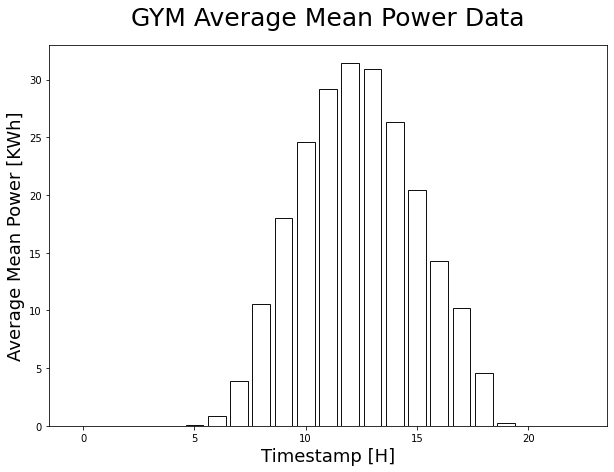

In [31]:
fig=plt.figure()

plt.figure(figsize=(10,7))
plt.bar(x=x_data_df, height=y_data_df,color='white', edgecolor='#111111')
plt.title("GYM Average Mean Power Data", fontsize=25, pad=20)
plt.xlabel('Timestamp [H]', fontsize=18)
plt.ylabel('Average Mean Power [KWh]', fontsize=18)
# plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d KWh'))
# plt.fill_between(x_data_df, y_data_df,color='#000000')
# plt.figure(figsize=(5, 5))


plt.show()

In [32]:
std_df = final_df.groupby([final_df['timestamp'].dt.time])['mean_power'].std()

In [33]:
std_df

timestamp
00:00:00        0.000000
01:00:00        0.000000
02:00:00        0.000000
03:00:00        0.000000
04:00:00        0.000000
06:00:00      121.392139
07:00:00      659.010126
08:00:00     2012.926096
09:00:00     3812.029445
10:00:00     5311.050290
11:00:00     6349.475441
12:00:00     7252.200612
13:00:00     7867.992522
14:00:00     8745.301605
15:00:00    11504.178632
16:00:00    12851.923586
17:00:00    11870.120804
18:00:00     7538.790497
19:00:00     2539.378136
20:00:00      397.598719
21:00:00        0.086061
22:00:00        0.000000
23:00:00        0.000000
Name: mean_power, dtype: float64

In [34]:
std_list = []
for i in std_df:
    if str(i) == 'nan':
        i = 0.0
    std_list.append(float(i/1000))

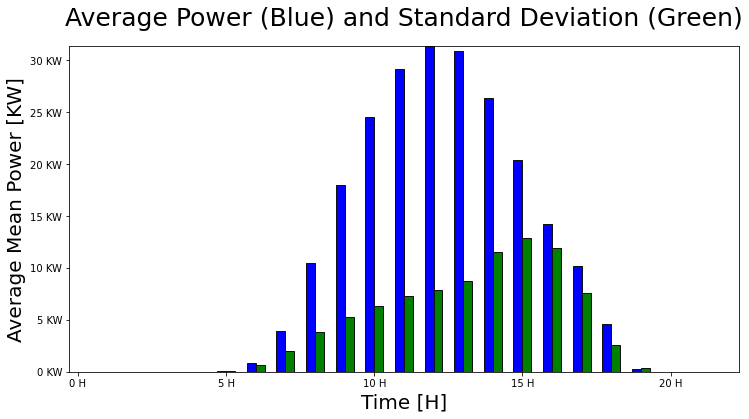

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
labels = x_data_df
avg_data = y_data_df
std_data = std_list

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

# fig, ax = plt.subplots()
plt.bar(x - width/2, avg_data, width, color='blue', edgecolor='#111111', label='Average Mean Power [KW]')
plt.bar(x + width/2, std_data, width, color='green', edgecolor='#111111', label='Standard Deviation')

plt.xlabel('Time [H]', fontsize=20)
plt.ylabel('Average Mean Power [KW]', fontsize=20)
plt.title("Average Power (Blue) and Standard Deviation (Green)", fontsize=25, pad=20)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d H'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d KW'))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.margins(x=0)
plt.margins(y=0)
# plt.legend()

plt.show()